In [2]:
pip install pandas openpyxl

In [8]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Path to your dataset in Google Drive
file_path = '/content/drive/MyDrive/Dataset/Online Retail.xlsx'
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama dari dataset
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


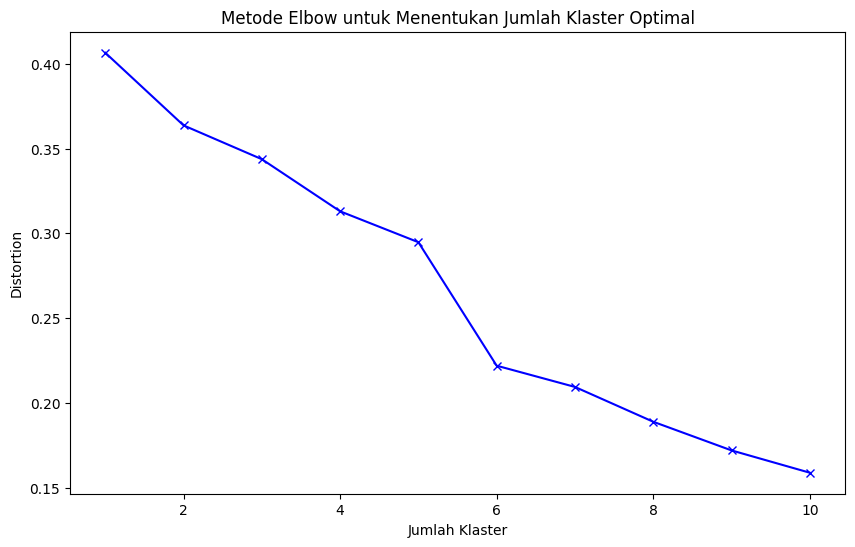

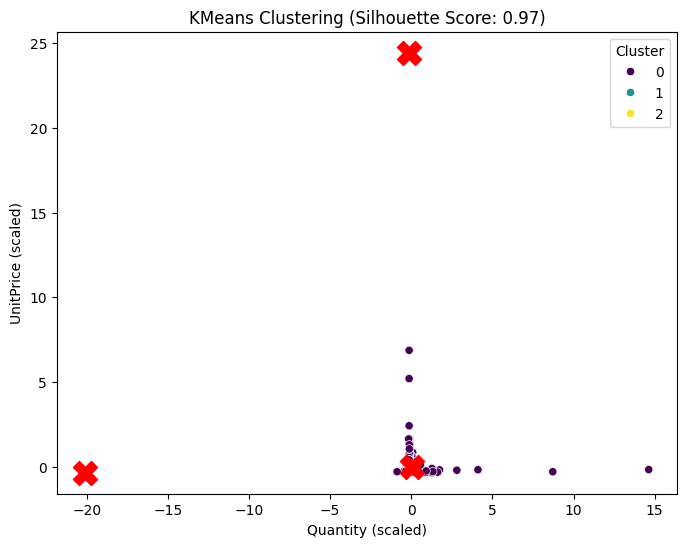

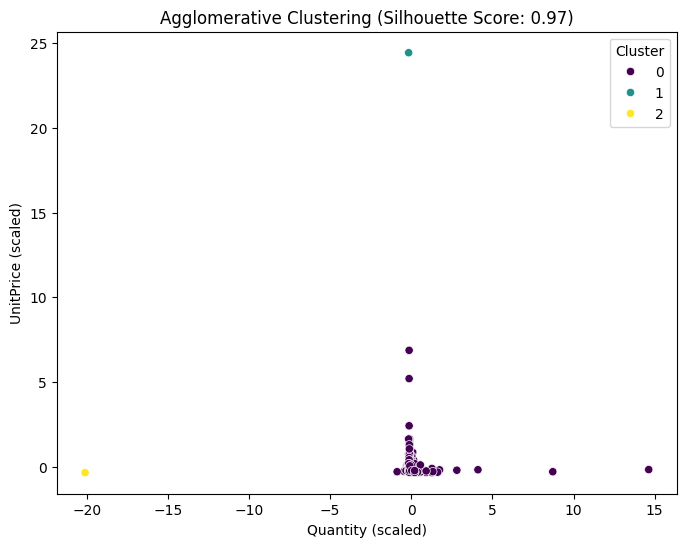

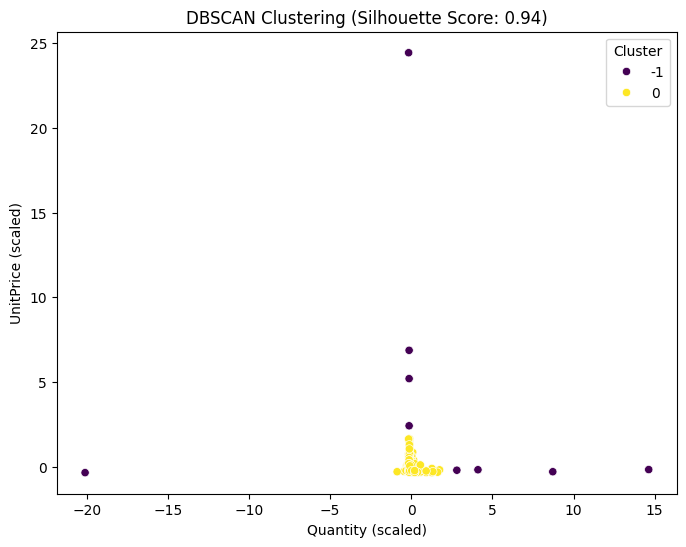

Silhouette Score KMeans: 0.97
Silhouette Score Agglomerative Clustering: 0.97
Silhouette Score DBSCAN: 0.94
Model terbaik berdasarkan silhouette score adalah Agglomerative Clustering dengan score 0.97


In [17]:
# Tentukan ukuran sampel berdasarkan jumlah baris dalam dataset
sample_size = min(10000, len(df))

# Ambil sampel dari dataset
df = df.sample(n=sample_size, random_state=42)

# Data Preprocessing
# Hapus data yang memiliki nilai null
df = df.dropna()
# Menggunakan hanya kolom numerik yang diperlukan untuk clustering
# Kita bisa menggunakan kolom seperti 'Quantity' dan 'UnitPrice' sebagai contoh
X = df[['Quantity', 'UnitPrice']]

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function untuk menentukan knee point pada KMeans
def calculate_knee(X):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    plt.figure(figsize=(10,6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Jumlah Klaster')
    plt.ylabel('Distortion')
    plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
    plt.show()

# Hitung elbow untuk KMeans
calculate_knee(X_scaled)

# Model 1: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

# Visualisasi hasil KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title(f'KMeans Clustering (Silhouette Score: {kmeans_silhouette:.2f})')
plt.xlabel('Quantity (scaled)')
plt.ylabel('UnitPrice (scaled)')
plt.legend(title='Cluster')
plt.show()

# Model 2: Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)
agglo_silhouette = silhouette_score(X_scaled, agglo_labels)

# Visualisasi hasil Agglomerative Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=agglo_labels, palette='viridis')
plt.title(f'Agglomerative Clustering (Silhouette Score: {agglo_silhouette:.2f})')
plt.xlabel('Quantity (scaled)')
plt.ylabel('UnitPrice (scaled)')
plt.legend(title='Cluster')
plt.show()

# Model 3: DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Menghitung silhouette score untuk DBSCAN jika terdapat lebih dari satu cluster
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
else:
    dbscan_silhouette = -1  # Silhouette score tidak valid

# Visualisasi hasil DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='viridis')
plt.title(f'DBSCAN Clustering (Silhouette Score: {dbscan_silhouette:.2f})')
plt.xlabel('Quantity (scaled)')
plt.ylabel('UnitPrice (scaled)')
plt.legend(title='Cluster')
plt.show()

# Kesimpulan: Bandingkan nilai silhouette score
print(f'Silhouette Score KMeans: {kmeans_silhouette:.2f}')
print(f'Silhouette Score Agglomerative Clustering: {agglo_silhouette:.2f}')
print(f'Silhouette Score DBSCAN: {dbscan_silhouette:.2f}')

# Tentukan model terbaik berdasarkan silhouette score
if kmeans_silhouette > agglo_silhouette and kmeans_silhouette > dbscan_silhouette:
    best_model = 'KMeans'
    best_score = kmeans_silhouette
elif agglo_silhouette > dbscan_silhouette:
    best_model = 'Agglomerative Clustering'
    best_score = agglo_silhouette
else:
    best_model = 'DBSCAN'
    best_score = dbscan_silhouette

print(f'Model terbaik berdasarkan silhouette score adalah {best_model} dengan score {best_score:.2f}')